<a href="https://colab.research.google.com/github/gillopy/Era5data3D/blob/main/copernicus_planet_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install cfgrib cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 100.2 MB/s eta 0:00:00


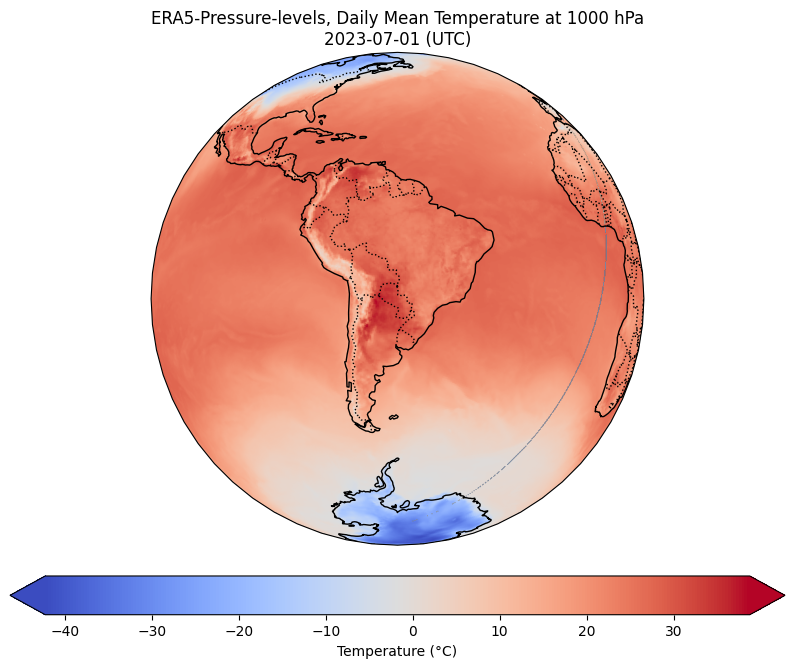

In [20]:
import numpy as np
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Cargar el dataset GRIB
file_path = "/content/drive/MyDrive/7d83013c8dc90556ff829f0a0327180d.grib"  # Cambia esto con tu archivo real
data = xr.open_dataset(file_path, engine='cfgrib')

# Extraer temperatura y coordenadas
lons = data.longitude.values
lats = data.latitude.values
temp = data.t2m.values[0] - 273.15  # Convertir de Kelvin a Celsius

# Crear la figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=-58, central_latitude=-23))  # Centrado en Paraguay
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Crear el mapa y proyectar los datos
mesh = ax.imshow(temp, extent=[lons.min(), lons.max(), lats.min(), lats.max()], transform=ccrs.PlateCarree(), cmap='coolwarm', origin='upper')

# Agregar barra de colores
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05, extend='both')
cbar.set_label('Temperature (°C)')
cbar.set_ticks(np.arange(-40, 40, 10))

# Agregar título
plt.title('ERA5-Pressure-levels, Daily Mean Temperature at 1000 hPa\n2023-07-01 (UTC)')

# Mostrar la figura
plt.show()


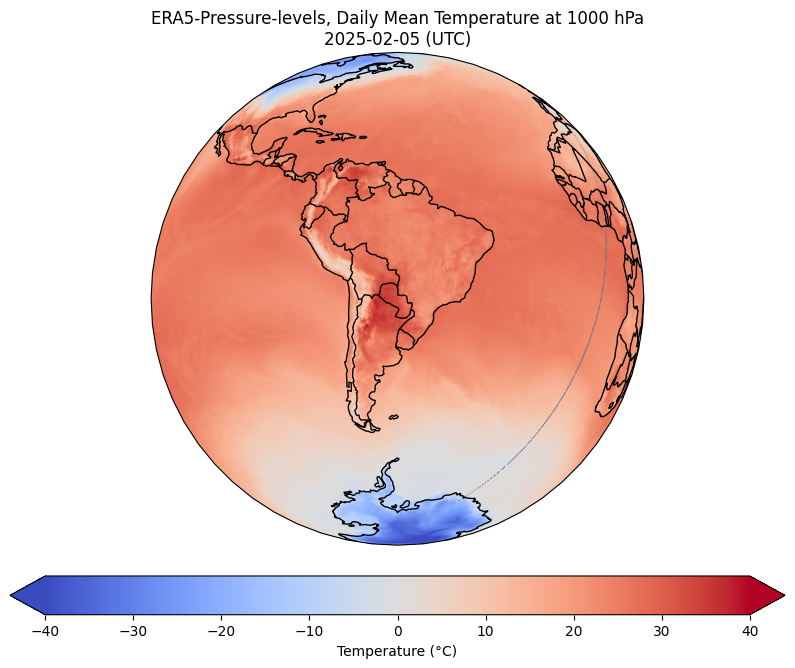

In [24]:
# Extraer temperatura y coordenadas
lons = data.longitude.values
lats = data.latitude.values
temp = data.t2m.values[0] - 273.15  # Convertir de Kelvin a Celsius

# Crear la figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=-58, central_latitude=-23))  # Centrado en Paraguay
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')

# Crear el mapa y proyectar los datos con un rango de temperatura más adecuado
vmin, vmax = -40, 40  # Rango de temperatura en grados Celsius
mesh = ax.imshow(temp, extent=[lons.min(), lons.max(), lats.min(), lats.max()],
                 transform=ccrs.PlateCarree(), cmap='coolwarm', origin='upper', vmin=vmin, vmax=vmax)

# Agregar barra de colores con el nuevo rango
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05, extend='both')
cbar.set_label('Temperature (°C)')
cbar.set_ticks(np.arange(vmin, vmax + 10, 10))

# Agregar título
plt.title('ERA5-Pressure-levels, Daily Mean Temperature at 1000 hPa\n2025-02-05 (UTC)')

# Mostrar la figura
plt.show()

In [23]:
data

<xarray.Dataset> Size: 100MB
Dimensions:     (time: 24, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 192B 2025-02-05 ... 2025-02-05T23:00:00
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 192B ...
Data variables:
    t2m         (time, latitude, longitude) float32 100MB 265.4 265.4 ... 237.4
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-12T16:18 GRIB to CDM+CF via cfgrib-0.9.1...